In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
import pandas as pd

# 1. Load the Data with specified encoding
# You can change 'ISO-8859-1' to the appropriate encoding if necessary
try:
    data = pd.read_csv('movies.csv', encoding='ISO-8859-1')
except UnicodeDecodeError as e:
    print(f"Error reading the CSV file: {e}")

# Display the first few rows of the dataframe
print(data.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [22]:

# 2. Explore the Data
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [23]:
# 3. Preprocess the Data
# Drop rows with missing values
data.dropna(inplace=True)

In [24]:
# Convert categorical features to numerical using Label Encoding
label_encoders = {}
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

In [25]:
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

In [26]:
# Separate features and target variable
X = data[categorical_features]
y = data['Rating']  # Assuming 'Rating' is the target column

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Engineering (if needed)
# Here, we might want to explore additional features, but let's start with the current features.

In [28]:
# 5. Train the Model
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:

# Make predictions
y_pred = model.predict(X_test)


In [30]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.7472958023928409
R^2 Score: 0.05640513143196668


In [31]:
# 6. Visualize Results


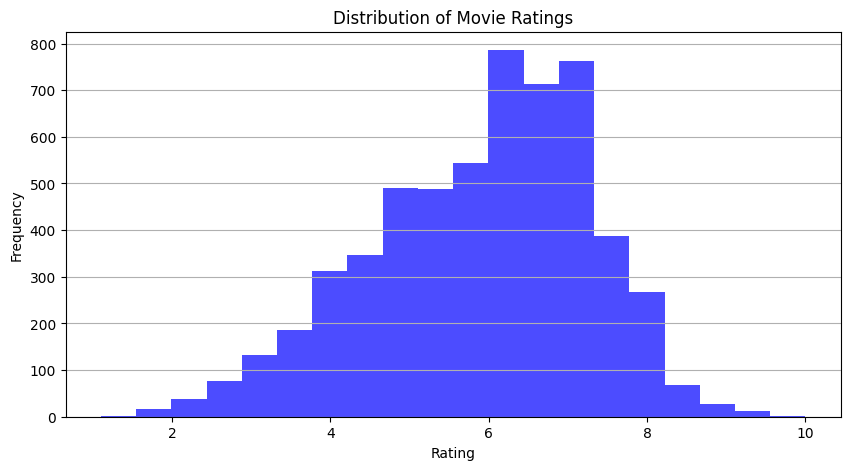

In [32]:

# Distribution of Ratings
plt.figure(figsize=(10, 5))
plt.hist(data['Rating'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


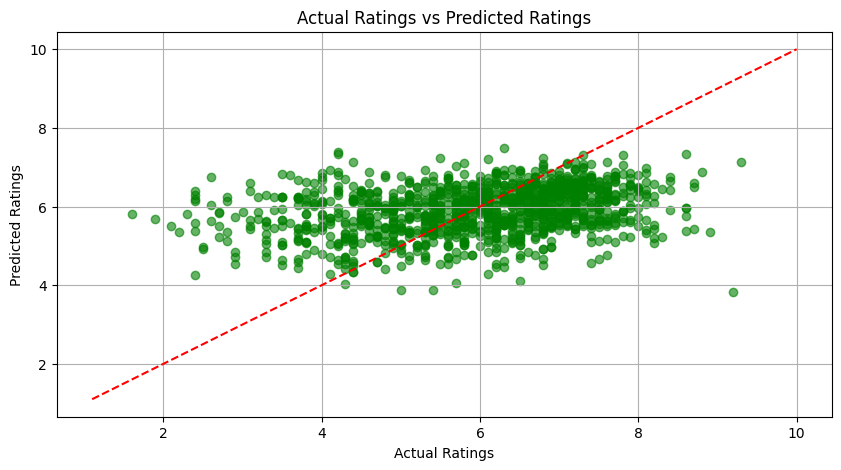

In [33]:
# Actual vs. Predicted Ratings
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual Ratings vs Predicted Ratings')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Diagonal line
plt.grid()
plt.show()

In [34]:

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': categorical_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



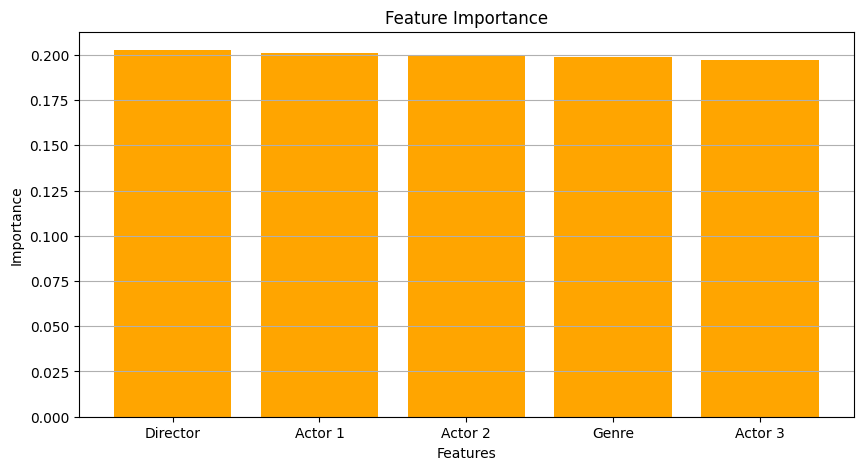

In [35]:

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='orange')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(axis='y')
plt.show()

In [36]:

# 7. Saving the Model
import joblib

# Save the model for later use
joblib.dump(model, 'movie_rating_model.pkl')

['movie_rating_model.pkl']